In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [63]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [64]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [66]:
df.shape

(10000, 14)

### We can check if any missing values or any duplicated row

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### To find the duplicated rows

In [68]:
df.duplicated().sum()

0

### How many people are in the bank and how many people left

In [69]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [70]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [71]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [72]:
import matplotlib.pyplot as plt

In [73]:
%matplotlib inline

In [74]:
import seaborn as sns

<Axes: xlabel='Geography', ylabel='count'>

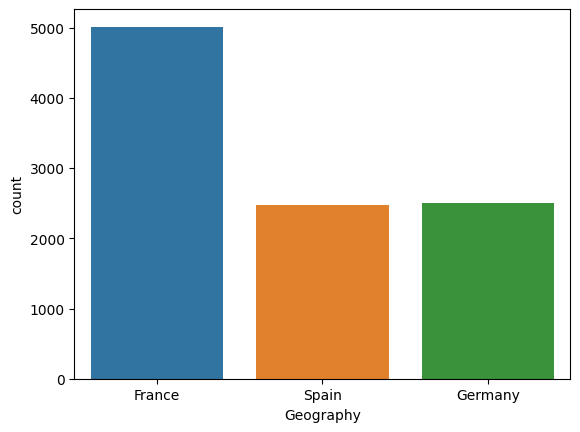

In [75]:
sns.countplot(data=df,x='Geography')

## Data Cleaning

In [76]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
df.drop(df.iloc[:,0:3],axis=1,inplace=True)

In [78]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### We can also do here , df.drop(columns=['...','...','...'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Need to convert the categorical variables to numerical variables

In [80]:
type(df['Gender'])

pandas.core.series.Series

In [81]:
df = pd.get_dummies(df,columns=['Gender','Geography'])

In [82]:
df = df.astype(int)

### we can see here the categorical values were not treated as categories but rather as a boolean therefore we used astype(int) to get 0 and 1 in our dataframe

In [83]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,1,1,0,1,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0,0,0,1
2,502,42,8,159660,3,1,0,113931,1,1,0,1,0,0
3,699,39,1,0,2,0,0,93826,0,1,0,1,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0,0,0,1


### making independent and dependent variables

In [91]:
X = df.drop(columns='Exited')
Y = df['Exited'] 

### Train-Test-Split

In [84]:
import sklearn

In [85]:
from sklearn.model_selection import train_test_split

In [92]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [94]:
x_train.shape

(8000, 13)

### Scaling the values before using the model (Standardisation) - Z-score

In [95]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [97]:
x_train_scaled = scale.fit_transform(x_train)

In [98]:
x_test_scaled = scale.transform(x_test)

### Now we are ready to import keras

In [115]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Create the model (Sequential model with dense used to add layers)

In [116]:
model = Sequential() # creating the model
# We are planning to create 3 layers , 1 i/p layer with 11 inputs, 1 hidden layer with 3 perceptrons and 1 o/p layer
# We are keeping 3 nodes/perceptron in the i/p layer 
model.add(Dense(3,activation='sigmoid',input_dim=13))
# We are adding the output layer with 1 node/perceptron
model.add(Dense(1,activation='sigmoid'))



/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### model.summary() is used to calculate the number of trainable parameters

In [117]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 3)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46 (184.00 B)

 Trainable params: 46 (184.00 B)

 Non-trainable params: 0 (0.00 B)

### Now we need to tell which loss function , which optimizer(convergence) to use

In [118]:
model.compile(optimizer='adam',loss='binary_crossentropy')

### Training the neural network (Fit the model)

In [119]:
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6095
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4948
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4603
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4380
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4447
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4333
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4388
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4314
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4219
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4346


### We need to get the weight and biases 

### model.layers[layer_number].get_weights() -> to get the weights and bias

In [122]:
model.layers[0].get_weights()  # 2-D array is weights , 1-D array at last is bias

[array([[ 0.43691945, -0.06482904, -0.13727024],
        [-1.3393247 , -1.4597342 ,  0.6763145 ],
        [-0.09232084, -0.03649127, -0.34348917],
        [-0.18539757, -0.3086038 ,  0.21932814],
        [ 0.81525004, -0.09348144,  0.06228136],
        [ 0.12450293,  0.0357485 ,  0.03019562],
        [ 0.809127  ,  0.5790377 , -0.7256989 ],
        [-0.01679363,  0.04467218,  0.3022075 ],
        [-0.17366926, -0.4402633 ,  0.09156775],
        [ 0.14464173, -0.13282394, -0.6183672 ],
        [ 0.07921874,  0.10868023, -0.5645109 ],
        [-0.27087542, -0.261149  ,  0.4075578 ],
        [-0.0049129 ,  0.05063382, -0.5211392 ]], dtype=float32),
 array([ 0.70060265,  0.4271171 , -0.3710146 ], dtype=float32)]

In [123]:
 model.layers[1].get_weights()

[array([[-0.6897283 ],
        [-1.914368  ],
        [ 0.76307267]], dtype=float32),
 array([-0.39956206], dtype=float32)]

### Predicting Models

In [126]:
model.predict(x_test_scaled) # Here we use sigmoid therefore we get the probability

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.10459704],
       [0.13010721],
       [0.12422987],
       ...,
       [0.05956832],
       [0.13206966],
       [0.37985453]], dtype=float32)

### Converting the probabilities to 0 and 1 , for this we need to set the threshold, to find the threshold we use ROC , AUC curve

In [129]:
# let's say we say if prob > 0.5 then 1 else 0
# np.where(condition,true_output,false_output) 

y_log = model.predict(x_test_scaled)
y_pred = np.where(y_log>0.5,1,0) #vectorized way to use conditional statements
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Finding the accuracy

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.808

### What we can do is by changing in the neural network , we can increase the score :- 

#### 1. Increasing the number of epochs
#### 2. Using different activation functions
#### 3. Adding more hidden layers


In [133]:
model = Sequential()

In [134]:
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [135]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 11)             │           154 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298 (1.16 KB)

 Trainable params: 298 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
scaler = StandardScaler()
x_train_scaled_2 = scaler.fit_transform(x_train)

In [150]:
x_test_scaled_2 = scaler.transform(x_test)

In [143]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [145]:
model.fit(x_train_scaled_2,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8743 - loss: 0.3133 - val_accuracy: 0.8531 - val_loss: 0.3498
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8710 - loss: 0.3111 - val_accuracy: 0.8537 - val_loss: 0.3481
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3198 - val_accuracy: 0.8525 - val_loss: 0.3483
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3154 - val_accuracy: 0.8537 - val_loss: 0.3521
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.3142 - val_accuracy: 0.8512 - val_loss: 0.3499
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8760 - loss: 0.3110 - val_accuracy: 0.8494 - val_loss: 0.3509
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3124 - val_accuracy: 0.8512 - val_loss: 0.3510
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8644 - loss: 0.3203 - val_accu

### We can see there is an overfitting above, even though we increase the loops the accuracy is not increasing

In [146]:
model.layers[0].get_weights()

[array([[ 9.22865272e-02,  5.55038393e-01,  1.94960997e-01,
          2.26126447e-01, -9.98114794e-02, -7.76523575e-02,
         -5.05422987e-02, -1.20315760e-01, -9.84740332e-02,
         -1.73152133e-03, -1.14818511e-03],
        [-7.42666364e-01,  1.63754374e-01, -8.81790996e-01,
          1.10045969e+00,  4.12134081e-01,  9.87242460e-01,
          2.28155285e-01, -1.31767988e+00, -7.06032813e-01,
          4.99572664e-01,  6.32061481e-01],
        [-1.37389064e-01, -3.00255269e-01, -3.90297681e-01,
         -5.62298857e-02, -1.18748985e-01,  1.72289044e-01,
          8.17298517e-02,  2.28682742e-01,  4.98108305e-02,
          2.63220996e-01,  2.07846090e-01],
        [-5.21547608e-02, -1.14155471e-01, -4.57415521e-01,
          4.22014683e-01, -9.28089738e-01, -5.17005861e-01,
         -1.33242071e-01, -1.05550334e-01, -7.37171471e-01,
          1.80962339e-01, -1.93078786e-01],
        [-1.65848676e-02,  2.79564619e-01, -3.12938720e-01,
          8.66564929e-01, -1.06519532e+00, -

In [151]:
y_log = model.predict(x_test_scaled_2)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [152]:
y_pred = np.where(y_log>0.5,1,0)

In [153]:
accuracy_score(y_test,y_pred)

0.86

### we can see accuracy increased

## Important graphs

In [154]:
history = model.fit(x_train_scaled_2,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8717 - loss: 0.3059 - val_accuracy: 0.8512 - val_loss: 0.3548
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8717 - loss: 0.3132 - val_accuracy: 0.8525 - val_loss: 0.3548
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3090 - val_accuracy: 0.8506 - val_loss: 0.3552
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3124 - val_accuracy: 0.8506 - val_loss: 0.3556
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8679 - loss: 0.3135 - val_accuracy: 0.8544 - val_loss: 0.3552
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8681 - loss: 0.3154 - val_accuracy: 0.8481 - val_loss: 0.3569
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8668 - loss: 0.3186 - val_accuracy: 0.8531 - val_loss: 0.3535
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.3183 - val_accu

## Getting the history

In [156]:
history

In [157]:
history.history

{'accuracy': [0.8682812452316284,
  0.8689062595367432,
  0.8715624809265137,
  0.8700000047683716,
  0.8696874976158142,
  0.8695312738418579,
  0.8701562285423279,
  0.8681250214576721,
  0.8675000071525574,
  0.8690624833106995,
  0.8687499761581421,
  0.8684375286102295,
  0.8704687356948853,
  0.8700000047683716,
  0.8706250190734863,
  0.8693749904632568,
  0.8693749904632568,
  0.8671875,
  0.8692187666893005,
  0.8706250190734863,
  0.8693749904632568,
  0.8690624833106995,
  0.8712499737739563,
  0.8706250190734863,
  0.8695312738418579,
  0.8692187666893005,
  0.8698437213897705,
  0.8700000047683716,
  0.8695312738418579,
  0.8712499737739563,
  0.8700000047683716,
  0.8700000047683716,
  0.8675000071525574,
  0.8689062595367432,
  0.8695312738418579,
  0.8692187666893005,
  0.8692187666893005,
  0.8689062595367432,
  0.8689062595367432,
  0.8700000047683716,
  0.8700000047683716,
  0.8696874976158142,
  0.8698437213897705,
  0.8676562309265137,
  0.8693749904632568,
  0.869

In [158]:
type(history.history)

dict

In [159]:
dict_values = history.history

In [161]:
dict_values.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Plotting the loss

In [171]:
df_values = pd.DataFrame(dict_values)

In [172]:
df_values.head()

,accuracy,loss,val_accuracy,val_loss
0,0.868281,0.313893,0.851250,0.354758
1,0.868906,0.314662,0.852500,0.354757
2,0.871562,0.314454,0.850625,0.355210
3,0.870000,0.313975,0.850625,0.355634
4,0.869687,0.313939,0.854375,0.355222


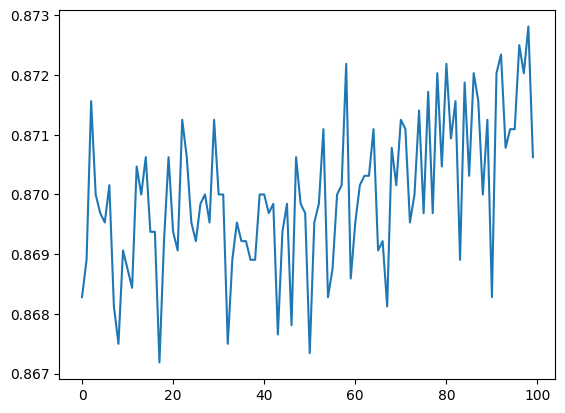

In [176]:
plt.plot(df_values['accuracy'])